## Tiempo de ejecución vs cantidad de días de entrenamiento ($n$)

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from glob import glob
from generacion_dataset import generar_dataset
from persistencia import importar_datos, exportar_datos, crear_directorio_salida, exportar_tiempos_ejecucion
from mediciones_tiempo import promediar_tiempos_ejecucion

In [37]:
MIN = 100
MAX = 10000
STEP = 100
RUTA_DATASET = f"../datasets/01_tiempos_ejecucion"
RUTA_TIEMPOS = f"../mediciones"
RUTA_FIGURAS = f"../figuras"

In [23]:
crear_directorio_salida(RUTA_DATASET)
crear_directorio_salida(RUTA_TIEMPOS)
crear_directorio_salida(RUTA_FIGURAS)

### Generación de datasets

In [7]:
for n in range(MIN, MAX, STEP):
    esfuerzo, energia = generar_dataset(n)
    ruta = f"{RUTA_DATASET}/{n}_elementos.txt"
    exportar_datos(n, esfuerzo, energia, ruta)

### Medición de tiempos

In [3]:
iteraciones = 5
resultados = []
archivos = glob(f"./{RUTA_DATASET}/*.txt")

for archivo in archivos:
    n_elementos = archivo.split('/')[-1].split('_')[0]
    dias, esfuerzo, energia = importar_datos(archivo)
    tiempo_promedio = promediar_tiempos_ejecucion(dias, esfuerzo, energia, iteraciones)
    resultados.append({"cantidad": int(n_elementos), "tiempo_ms": tiempo_promedio})

exportar_tiempos_ejecucion(resultados, f"{RUTA_TIEMPOS}/01_tiempos_ejecucion.csv", ["cantidad", "tiempo_ms"])

### Gráficos

In [4]:
df = pd.read_csv(f"{RUTA_TIEMPOS}/01_tiempos_ejecucion.csv")

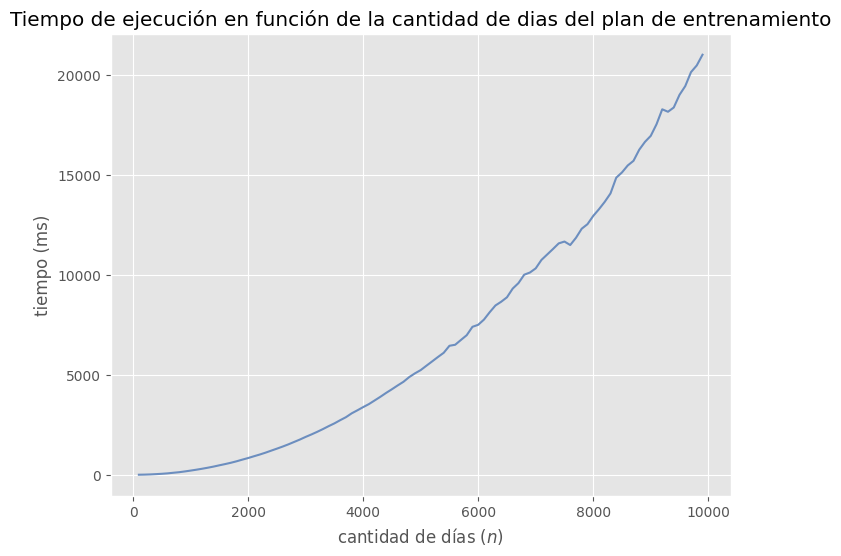

In [39]:
plt.style.use('ggplot')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.lineplot(data=df, x="cantidad", y="tiempo_ms", ax=ax, color="#6C8EBF")
ax.set_title("Tiempo de ejecución en función de la cantidad de dias del plan de entrenamiento")
ax.set_xlabel("cantidad de días ($n$)")
ax.set_ylabel("tiempo (ms)")

fig.savefig(f"{RUTA_FIGURAS}/01_tiempo_ejecucion", bbox_inches="tight")

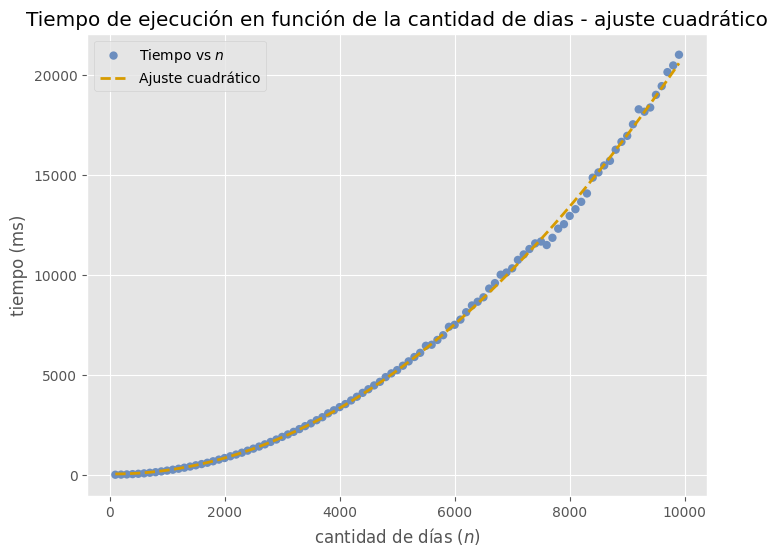

In [40]:
#ajuste por una función cuadrática

def funcion_cuadratica(n, a, b, c):
    return a * n**2 + b * n + c

x = df.cantidad
y = df.tiempo_ms

coeficientes, _ = curve_fit(funcion_cuadratica, x, y)
ajuste = funcion_cuadratica(x, *coeficientes)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.scatterplot(
    data=df, 
    x="cantidad", 
    y="tiempo_ms", 
    ax=ax,
    color="#6c8ebf",
    edgecolor="none"
)

sns.lineplot(
   x=x,
   y=ajuste,
   color="#d79b00",
   linestyle="--",
   linewidth="2",
)

ax.set_title("Tiempo de ejecución en función de la cantidad de dias - ajuste cuadrático")
ax.set_xlabel("cantidad de días ($n$)")
ax.set_ylabel("tiempo (ms)")
plt.legend(labels=["Tiempo vs $n$", "Ajuste cuadrático"])
fig.savefig(f"{RUTA_FIGURAS}/02_tiempo_ejecucion_ajuste_cuadratico", bbox_inches="tight")
